### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра математического моделирования и искусственного интеллекта

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ № 7

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Матюшкин Денис Владимирович
##### Группа:   НПИбд-02-21

## Москва 2024
***

### Вариант 4  

Automobile Data Set  

Название файла: imports-85.data

Ссылка: https://archive.ics.uci.edu/ml/datasets/Automobile  

Класс: symboling (столбец No 1)

Зависимая переменная: price (столбец No 26)  

Метод обработки пропущенных значений – среднее значение класса

Метод обработки выбросов – алгоритм кластеризации OPTICS

Метод снижения размерности данных – линейная регрессия (LinearRegression)

Регрессоры:

- Полиномиальная регрессия (PolynomialFeatures+LinearRegression), параметр degree в диапазоне от 2 до 5

- гребневая регрессия (Ridge), параметр alpha в диапазоне от 0.1 до 1

- регрессии на основе метода опорных векторов (SVR), параметр degree в диапазоне от 1 до 5

Показатели качества регрессии:

- Для определения лучшего регрессора MSPE

- Для визуализации кривой обучения MSLE

1. Считайте заданный набор данных из репозитария UCI, включая указанный в индивидуальном задании столбец с метками классов и столбец с откликом (зависимой переменной).

In [120]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [121]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data"

column_names = ["symboling", "normalized-losses", "make", "fuel-type", "aspiration", "num-of-doors",
                "body-style", "drive-wheels", "engine-location", "wheel-base", "length", "width",
                "height", "curb-weight", "engine-type", "num-of-cylinders", "engine-size",
                "fuel-system", "bore", "stroke", "compression-ratio", "horsepower", "peak-rpm",
                "city-mpg", "highway-mpg", "price"]

my_data = pd.read_csv(url, names=column_names)
my_data.head()
my_data.shape

(205, 26)

2. Преобразуйте в числовые признаки неправильно распознанные признаки с числовыми значениями. Если в столбцах с метками классов и откликом имеются пропущенные значения, то удалите записи с пропущенными значениями. Оставьте в наборе данных только числовые признаки.

In [122]:
my_data.replace('?', np.nan, inplace=True)

numeric_columns = ['normalized-losses', 'wheel-base', 'length', 'width', 'height',
                   'curb-weight', 'engine-size', 'bore', 'stroke',
                   'compression-ratio', 'horsepower', 'peak-rpm', 'city-mpg',
                   'highway-mpg', 'price']

for col in numeric_columns:
    my_data[col] = pd.to_numeric(my_data[col], errors='coerce')

my_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          205 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   make               205 non-null    object 
 3   fuel-type          205 non-null    object 
 4   aspiration         205 non-null    object 
 5   num-of-doors       203 non-null    object 
 6   body-style         205 non-null    object 
 7   drive-wheels       205 non-null    object 
 8   engine-location    205 non-null    object 
 9   wheel-base         205 non-null    float64
 10  length             205 non-null    float64
 11  width              205 non-null    float64
 12  height             205 non-null    float64
 13  curb-weight        205 non-null    int64  
 14  engine-type        205 non-null    object 
 15  num-of-cylinders   205 non-null    object 
 16  engine-size        205 non

Удаляем строки с пропущенными значениями в столбцах symboling (классы) и price (отклик):

In [123]:
cols = ['symboling', 'price']
my_data[cols].isnull().sum()

,0
symboling,0
price,4


In [124]:
my_data.dropna(subset=cols, inplace=True)

Оставляем в наборе данных только числовые признаки:

In [125]:
my_data = my_data.select_dtypes(include=['float64', 'int64'])

my_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 201 entries, 0 to 204
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  164 non-null    float64
 2   wheel-base         201 non-null    float64
 3   length             201 non-null    float64
 4   width              201 non-null    float64
 5   height             201 non-null    float64
 6   curb-weight        201 non-null    int64  
 7   engine-size        201 non-null    int64  
 8   bore               197 non-null    float64
 9   stroke             197 non-null    float64
 10  compression-ratio  201 non-null    float64
 11  horsepower         199 non-null    float64
 12  peak-rpm           199 non-null    float64
 13  city-mpg           201 non-null    int64  
 14  highway-mpg        201 non-null    int64  
 15  price              201 non-null    float64
dtypes: float64(11), int64(5)
memory

3. Если в наборе данных остались пропущенные значения, то замените пропущенные значения, используя метод, указанный в индивидуальном задании. Если пропущенные значения в наборе данных отсутствуют, то определите и удалите точки с выбросами в соответствии с методом, указанным в индивидуальном задании. Выберите параметры методов таким образом, чтобы выбросы составляли не менее 5% всех точек набора данных.


In [126]:
from sklearn.cluster import OPTICS

In [127]:
my_data.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,NaN,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,NaN,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


In [128]:
if my_data.isnull().sum().sum() > 0:
  for column in my_data.columns:
        mean_value = my_data[column].mean()
        my_data[column] = my_data[column].fillna(mean_value)

  print("Обнаружены пропущенные значения, поменяли их на среднее значение классов.")
else:
  optics = OPTICS(min_samples=10, xi=0.15, min_cluster_size=0.1)
  optics.fit(my_data)

  labels = optics.labels_

  n_outliers = np.sum(labels == -1)
  total_points = my_data.shape[0]
  outlier_percentage = (n_outliers / total_points) * 100

  print("Пропущенных значений нет, обработали выбросы.")
  print(f"Найдено {n_outliers} выбросов.")
  print(f"Процент удаленных выбросов: {outlier_percentage:.2f}%")

  my_data = my_data[labels != -1]

my_data.head()

Обнаружены пропущенные значения, поменяли их на среднее значение классов.


,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,13495.0
1,3,122.0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111.0,5000.0,21,27,16500.0
2,1,122.0,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154.0,5000.0,19,26,16500.0
3,2,164.0,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102.0,5500.0,24,30,13950.0
4,2,164.0,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115.0,5500.0,18,22,17450.0


4. Масштабируйте признаки набора данных на интервал [0, 1]. Используя метод снижения размерности данных, указанный в индивидуальном задании, оставьте в наборе данных три признака (кроме метки класса и откликов), принимающих более 50 различных значений.

In [129]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression

In [130]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(my_data)

scaled_df = pd.DataFrame(scaled_data, columns=my_data.columns)

scaled_df.head()

,symboling,normalized-losses,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.207959
1,1.0,0.298429,0.058309,0.413433,0.324786,0.083333,0.411171,0.260377,0.664286,0.290476,0.1250,0.294393,0.346939,0.222222,0.289474,0.282558
2,0.6,0.298429,0.230321,0.449254,0.444444,0.383333,0.517843,0.343396,0.100000,0.666667,0.1250,0.495327,0.346939,0.166667,0.263158,0.282558
3,0.8,0.518325,0.384840,0.529851,0.504274,0.541667,0.329325,0.181132,0.464286,0.633333,0.1875,0.252336,0.551020,0.305556,0.368421,0.219254
4,0.8,0.518325,0.373178,0.529851,0.521368,0.541667,0.518231,0.283019,0.464286,0.633333,0.0625,0.313084,0.551020,0.138889,0.157895,0.306142


In [131]:
filtered_columns = [col for col in scaled_df.columns if scaled_df[col].nunique() > 50 and col not in ['symboling', 'price']]

filtered_columns

['normalized-losses', 'wheel-base', 'length', 'curb-weight', 'horsepower']

In [132]:
X = scaled_df[filtered_columns]
y = my_data['price']

X.shape, y.shape

((201, 5), (201,))

In [133]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [134]:
coefficients = model.coef_
coef_df = pd.DataFrame(coefficients, index=X.columns, columns=['Coefficient']).sort_values(by='Coefficient', ascending=False)

coef_df.head()

,Coefficient
horsepower,21553.749440
curb-weight,18985.223087
wheel-base,7522.320311
normalized-losses,-194.788872
length,-6595.827329


In [135]:
top_features = coef_df.head(3).index.tolist()
reduced_data = scaled_df[top_features].copy()

reduced_data['symboling'] = my_data['symboling'].values
reduced_data['price'] = my_data['price'].values

print("Выбранные три признака:")
print(top_features)
print("Новый набор данных:")
print(reduced_data.head())

Выбранные три признака:
['horsepower', 'curb-weight', 'wheel-base']
Новый набор данных:
   horsepower  curb-weight  wheel-base  symboling    price
0    0.294393     0.411171    0.058309          3  13495.0
1    0.294393     0.411171    0.058309          3  16500.0
2    0.495327     0.517843    0.230321          1  16500.0
3    0.252336     0.329325    0.384840          2  13950.0
4    0.313084     0.518231    0.373178          2  17450.0


5. Визуализируйте набор данных в виде точек в трехмерном пространстве, отображая точки разных классов разными цветами. В качестве подписей осей используйте названия признаков. В подписи рисунка укажите название набора данных. Создайте легенду набора данных.

In [136]:
colors = { -2.0: 'blue', -1.0: 'green', 0.0: 'yellow', 1.0: 'orange', 2.0: 'red', 3.0: 'purple' }
reduced_data['symboling'].unique()

array([ 3,  1,  2,  0, -1, -2])

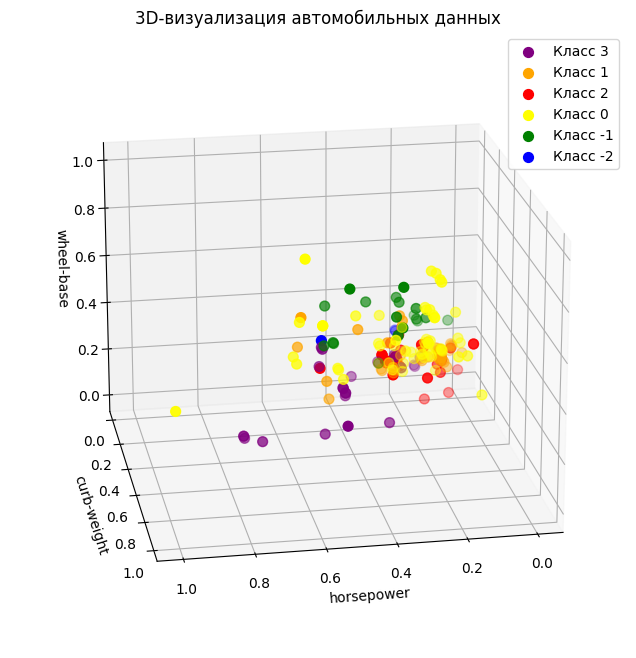

In [137]:
from mpl_toolkits.mplot3d import Axes3D

x_feature = top_features[0]
y_feature = top_features[1]
z_feature = top_features[2]

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for symboling_class in reduced_data['symboling'].unique():
    class_data = reduced_data[reduced_data['symboling'] == symboling_class]
    ax.scatter(
        class_data[x_feature], class_data[y_feature], class_data[z_feature],
        label=f'Класс {int(symboling_class)}', color=colors[symboling_class], s=50, marker='o'
    )

ax.set_xlabel(x_feature)
ax.set_ylabel(y_feature)
ax.set_zlabel(z_feature)
ax.view_init(elev=20, azim=80)

plt.title('3D-визуализация автомобильных данных')
ax.legend()

plt.show()

6. Разбейте набор данных на обучающую и тестовую выборки. Постройте регрессоры на базе моделей регрессии, указанных в индивидуальном задании, для каждого из трех признаков. Определите оптимальные параметры регрессоров при помощи GridSearchCV.

In [138]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline

In [139]:
X = reduced_data[top_features]
y = reduced_data['price']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((160, 3), (41, 3), (160,), (41,))

1. Полиномиальная регрессия

In [140]:
poly_pipe = Pipeline([
    ('poly_features', PolynomialFeatures()),
    ('scaler', StandardScaler()),
    ('linear_reg', LinearRegression())
])

poly_params = {
    'poly_features__degree': [2, 3, 4, 5]
}

poly_grid = GridSearchCV(poly_pipe, param_grid=poly_params, scoring='neg_mean_squared_error', cv=5)
poly_grid.fit(X_train, y_train)

print(f"Лучшие параметры для полиномиальной регрессии: {poly_grid.best_params_}")

Лучшие параметры для полиномиальной регрессии: {'poly_features__degree': 2}


2. Гребневая регрессия (Ridge)

In [141]:
ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge())
])

ridge_params = {
    'ridge__alpha': np.linspace(0.1, 1, 10)
}

ridge_grid = GridSearchCV(ridge_pipe, param_grid=ridge_params, scoring='neg_mean_squared_error', cv=5)
ridge_grid.fit(X_train, y_train)

print(f"Лучшие параметры для гребневой регрессии: {ridge_grid.best_params_}")

Лучшие параметры для гребневой регрессии: {'ridge__alpha': 1.0}


3. Регрессия на основе метода опорных векторов (SVR)

In [142]:
svr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(kernel='poly'))
])

svr_params = {
    'svr__degree': [1, 2, 3, 4, 5],
    'svr__C': [0.1, 1, 10]
}

svr_grid = GridSearchCV(svr_pipe, param_grid=svr_params, scoring='neg_mean_squared_error', cv=5)
svr_grid.fit(X_train, y_train)

print(f"Лучшие параметры для SVR: {svr_grid.best_params_}")

Лучшие параметры для SVR: {'svr__C': 10, 'svr__degree': 3}


7. Для каждого из трех признаков визуализируйте на плоскости набор данных одним цветом и линии регрессии для регрессоров с оптимальными параметрами, определенными в п. 6 (всего три рисунка). Регрессоры, имеющие максимальное значение показателя качества регрессии, указанного в индивидуальном задании, выделите красным цветом. В качестве подписи оси X используйте название признака, в качестве подписи оси Y – название столбца с откликами. Создайте легенду для линий регрессии.

In [143]:
from sklearn.metrics import mean_squared_error

def plot_regression(X_train, X_test, y_train, y_test, feature_name, models, best_model_name):
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test, y_test)

    x_range = np.linspace(X_test.min(), X_test.max(), 100).reshape(-1, 1)
    x_range_df = pd.DataFrame(x_range, columns=[feature_name])

    for model_name, model, color in models:
        y_pred = model.predict(x_range_df)
        line_color = 'red' if model_name == best_model_name else color
        plt.plot(x_range, y_pred, label=f'{model_name}', color=line_color)

    plt.xlabel(feature_name)
    plt.ylabel('price')
    plt.title(f'Линия регресси для {feature_name}')
    plt.legend()
    plt.show()

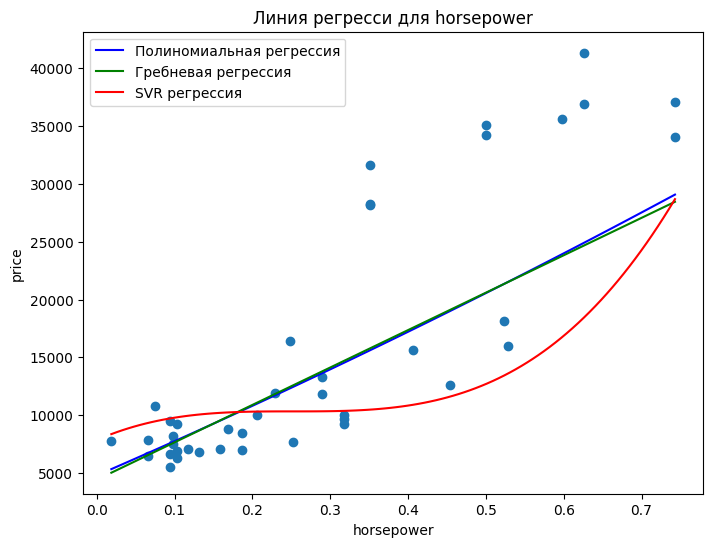

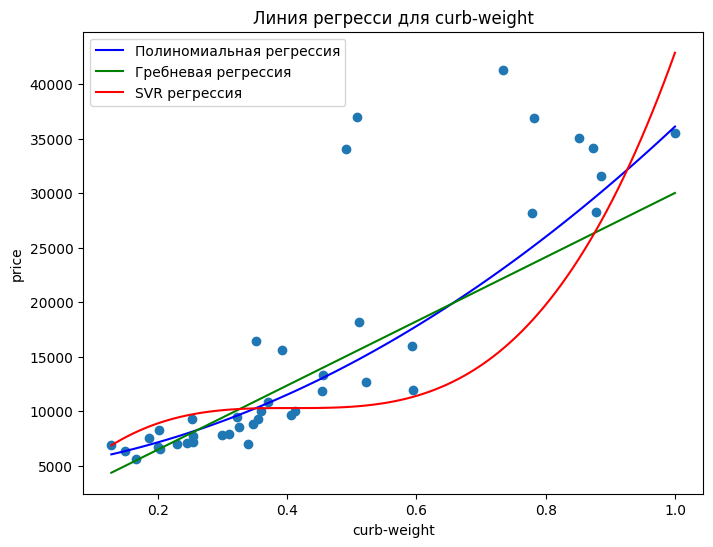

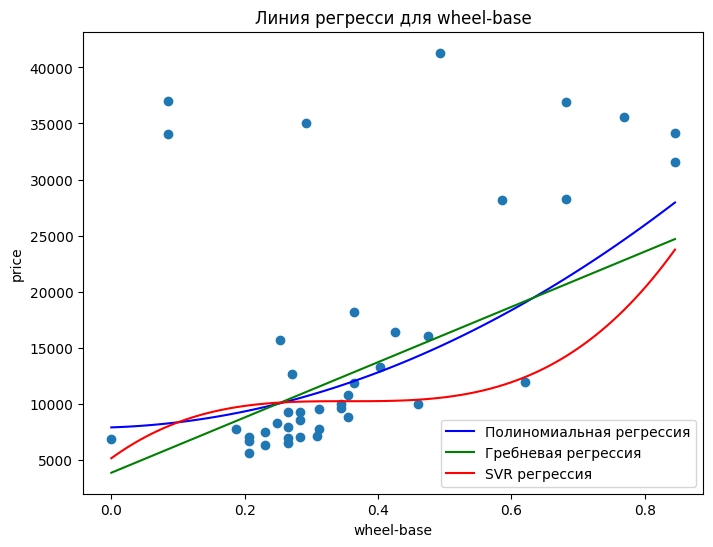

In [144]:
feature_names = top_features

for feature_name in feature_names:
    X_train_feat = X_train[[feature_name]]
    X_test_feat = X_test[[feature_name]]

    poly_pipe = Pipeline([
        ('poly_features', PolynomialFeatures(degree=2)),
        ('linear_reg', LinearRegression())
    ])
    poly_pipe.fit(X_train_feat, y_train)

    ridge_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('ridge', Ridge(alpha=1.0))
    ])
    ridge_pipe.fit(X_train_feat, y_train)

    svr_pipe = Pipeline([
        ('scaler', StandardScaler()),
        ('svr', SVR(C=10, degree=3, kernel='poly'))
    ])
    svr_pipe.fit(X_train_feat, y_train)

    models = [
        ('Полиномиальная регрессия', poly_pipe, 'blue'),
        ('Гребневая регрессия', ridge_pipe, 'green'),
        ('SVR регрессия', svr_pipe, 'orange')
    ]

    mspe_scores = {}
    for model_name, model, _ in models:
        y_pred = model.predict(X_test_feat)
        mspe = mean_squared_error(y_test, y_pred)
        mspe_scores[model_name] = mspe

    best_model_name = max(mspe_scores, key=mspe_scores.get)

    plot_regression(X_train_feat, X_test_feat, y_train, y_test, feature_name, models, best_model_name)

8. Постройте на одном рисунке кривые обучения (зависимость показателя качества регрессии, указанного в индивидуальном задании, от количества точек в обучающей выборке) для трех лучших регрессоров для каждого из трех признаков по показателю качества, указанному в индивидуальном задании. Кривые для регрессора с максимальным показателем качества визуализируйте красным цветом (кривую для обучающей выборки сплошной линией, кривую для тестовой выборки линией из точек). Подпишите корректно оси и создайте легенду для кривых обучения.

In [163]:
from sklearn.metrics import mean_squared_log_error
from sklearn.metrics import mean_absolute_percentage_error

def plot_learning_curves(X_train, X_test, y_train, y_test, models, best_model_name):
    plt.figure(figsize=(10, 6))
    train_sizes = np.linspace(0.1, 1.0, 10)

    for model_name, model, color in models:
        train_errors = []
        test_errors = []

        for train_size in train_sizes:
            X_train_part = X_train[:int(len(X_train) * train_size)]
            y_train_part = y_train[:int(len(y_train) * train_size)]

            model.fit(X_train_part, y_train_part)

            y_train_pred = model.predict(X_train_part)
            train_error = mean_absolute_percentage_error(y_train_part, y_train_pred)
            train_errors.append(train_error)

            y_test_pred = model.predict(X_test)
            test_error = mean_absolute_percentage_error(y_test, y_test_pred)
            test_errors.append(test_error)

        line_color = 'red' if model_name == best_model_name else color
        plt.plot(train_sizes, train_errors, label=f'{model_name} (train)', color=line_color, linestyle='-')
        plt.plot(train_sizes, test_errors, 'o--', label=f'{model_name} (test)', color=line_color)

    plt.xlabel('Размер обучающей выборки')
    plt.ylabel('MAPE')
    plt.title('Кривые обучения для всех регрессоров')
    plt.legend()
    plt.show()

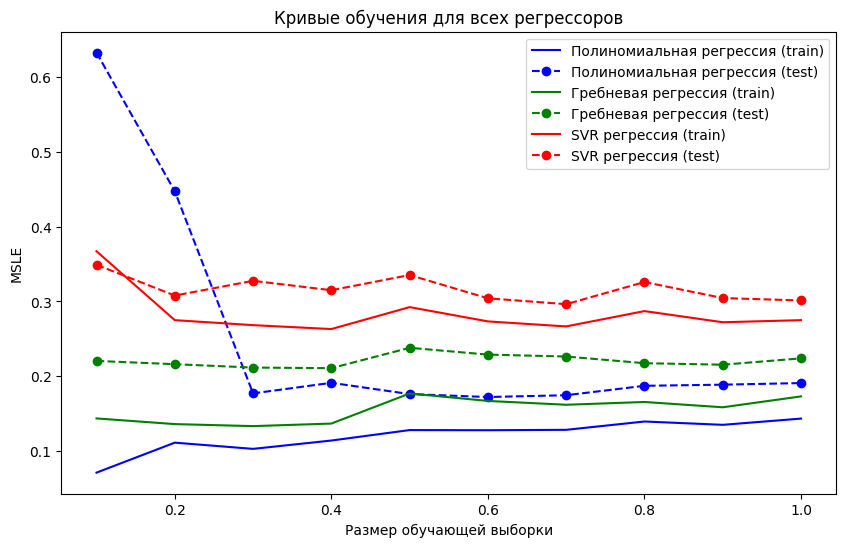

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

poly_pipe = Pipeline([
    ('poly_features', PolynomialFeatures(degree=2)),
    ('linear_reg', LinearRegression())
])
poly_pipe.fit(X_train, y_train)

ridge_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('ridge', Ridge(alpha=1.0))
])
ridge_pipe.fit(X_train, y_train)

svr_pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('svr', SVR(C=10, degree=3, kernel='poly'))
])
svr_pipe.fit(X_train, y_train)

models = [
    ('Полиномиальная регрессия', poly_pipe, 'blue'),
    ('Гребневая регрессия', ridge_pipe, 'green'),
    ('SVR регрессия', svr_pipe, 'orange')
]

mspe_scores = {}
for model_name, model, _ in models:
    y_pred = model.predict(X_test)
    mspe = mean_squared_error(y_test, y_pred)
    mspe_scores[model_name] = mspe

best_model_name = max(mspe_scores, key=mspe_scores.get)
plot_learning_curves(X_train, X_test, y_train, y_test, models, best_model_name)

P.S. Использую для примера не MSLE, а MAPE из-за того, что метрика MSLE требует, чтобы все предсказанные значения были положительными, даже при:
```python
y_train = y_train + abs(np.min(y_train)) + 1
y_test = y_test + abs(np.min(y_test)) + 1
```

возникает ошибка типа
```
ValueError                                Traceback (most recent call last)
<ipython-input-157-47c386fe44e7> in <cell line: 72>()
     70 y_test = y_test + abs(np.min(y_test)) + 1
     71
---> 72 plot_learning_curves(X_train, X_test, y_train, y_test, models, best_model_name)

2 frames
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_regression.py in mean_squared_log_error(y_true, y_pred, sample_weight, multioutput, squared)
    693
    694     if (y_true < 0).any() or (y_pred < 0).any():
--> 695         raise ValueError(
    696             "Mean Squared Logarithmic Error cannot be used when "
    697             "targets contain negative values."

ValueError: Mean Squared Logarithmic Error cannot be used when targets contain negative values.
<Figure size 1000x600 with 0 Axes>
```